# Best Bargain Analysis

After <a href='scraping_engine.ipynb'> scraping </a> and <a href='convert.ipynb'>preparing</a>, with clear database of potential bargains, we can adapt some customized queries to see the best offers.

For this we will need pandas, plots and arrays

### Tools and database

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load database

In [2]:
df = pd.read_csv('Electronic_PL_sample_database.csv')
len(df.index)

3491

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'price', 'ratio', 'start', 'avg_rating',
       'rating_count', 'low', 'med', 'high', 'want', 'have', 'seller',
       'ships_from', 'label', 'last_sold', 'for_sale', 'url', 'styles',
       'comment', 'condition', 'shipping_cost', 'hi-low', 'discount', 'hi-med',
       'bargain_label'],
      dtype='object')

Not all columns will be used in this notebook, they are here for further need. For printing consistent we will use specific  view.

In [4]:
print_view = ['discount', 'title', 'start', 'price', 'med', 'high', 'url', 'want', 'have', 'for_sale']

### Database overview

Let's get some basic knowledge about the data shape. 

In sample database, we use merged databases scraped during three sessions narrowed to sellers from Poland. Let's make some queries for top values in important columns.

In [5]:
df['label'].value_counts().head(5)

House_PL          1815
Drum+n+Bass_PL    1391
Breakbeat_PL       285
Name: label, dtype: int64

In [6]:
df['ships_from'].value_counts().head(5)

Poland    3491
Name: ships_from, dtype: int64

In [7]:
df['styles'].value_counts().head(5)

['House']              377
['Techno']             313
['House;DeepHouse']    202
['House;Techno']       175
['Techno;House']        56
Name: styles, dtype: int64

In [8]:
df['condition'].value_counts().head(5)

Mint (M)                1400
Very Good Plus (VG+)    1107
Near Mint (NM or M-)     984
Name: condition, dtype: int64

In [9]:
df['bargain_label'].value_counts().head(5)

expensive     1029
good          1005
overpriced     607
greedy         459
very nice      391
Name: bargain_label, dtype: int64

This market pricing is usually close to sales history median (labelled as `good`), but often is more `expensive`, even `overpriced` or `greedy`. We would like to focus on `very nice` prices as they are lower than 85% of sales history median

## Price Analysis

### Seller market

By adding some conditions, we can find more valuable information about the market.

<i>"Which seller has the <b>cheapest records</b> and how much of them are in his offer?"</i>

In [10]:
# 'very nice' label means price is lower than 85% of sale history median
df[df['bargain_label'] == 'very nice']['seller'].value_counts().head(5)

Cyman-Records        47
lonhaul              36
bartoszkruczynski    34
dusty-diggers        29
UzywanaMuzyka        16
Name: seller, dtype: int64

<i>"Which seller has the <b>most expensive records</b> and how much of them are in his offer?"</i>

In [11]:
# 'greedy' label means price is higher than 220% of sale history median`
df[df['bargain_label'] == 'greedy']['seller'].value_counts().head(5)

dj.romy          47
gadzieciak       42
goodmusic4u      33
spertusiak85     33
HeyJoeRecords    26
Name: seller, dtype: int64

### Seller pricing audit

In similar way we can make a quick pricing audit in scope of bargains for sellers from top of both lists

<i>"How looks <b>pricing principles</b> for particular seller?"</i>

In [12]:
df[df['seller'] == 'Cyman-Records']['bargain_label'].value_counts().head(5)

good          162
very nice      47
expensive      30
overpriced      2
Name: bargain_label, dtype: int64

In [13]:
df[df['seller'] == 'dj.romy']['bargain_label'].value_counts().head(5)

greedy        47
overpriced    16
expensive      7
good           1
Name: bargain_label, dtype: int64

### Discounts

Discount is the main factor for profitability. It should be calculated before while <a href='convert.ipynb'>preparing</a> data so we can use it as sorting indicator in our formula.

In [14]:
df[print_view].sort_values(by='discount', ascending=False).head(15)

,discount,title,start,price,med,high,url,want,have,for_sale
494,18.40,"b'Ubik - Just Add People (LP, Album)'",27.36,40.00,58.40,71.14,https://www.discogs.com/sell/item/1081220481,459,74,15
1761,11.58,"b'John Swing / EMG - LiveJam Limited 001 (12"",...",2.45,6.90,18.48,25.00,https://www.discogs.com/sell/item/842295550,174,127,24
659,11.37,b'Shed / Don Williams / Sven Weisemann - 2nd B...,9.00,9.00,20.37,25.00,https://www.discogs.com/sell/item/1162546824,397,233,14
1972,11.10,b'Groove Armada - Goodbye Country (Hello Night...,18.00,28.90,40.00,69.00,https://www.discogs.com/sell/item/792637073,316,261,24
1713,11.05,"b'Teluric - Pulsa\xc5\xa3ii Profunde (12"", EP)'",10.79,12.90,23.95,33.25,https://www.discogs.com/sell/item/1148905703,313,330,29
614,10.98,"b'Dino Sabatini - Modulated Waves (12"")'",12.71,13.00,23.98,40.00,https://www.discogs.com/sell/item/1169040671,190,127,15
1746,10.18,"b'Sassy J - Patchwork (2x12"", Comp + 7"" + S/Ed...",11.90,11.90,22.08,29.71,https://www.discogs.com/sell/item/1041085741,144,137,18
3016,9.63,"b'Pola (11) - XXXIII (12"", EP)'",9.19,10.99,20.62,33.12,https://www.discogs.com/sell/item/1175263148,295,203,15
2046,8.95,b'Bufiman / Tim Schumacher (3) - Manifest#003 ...,15.00,15.00,23.95,35.00,https://www.discogs.com/sell/item/1039981956,451,117,10
753,8.45,"b'Suguru Kusumi - Usktot EP (12"", EP)'",9.90,10.00,18.45,22.94,https://www.discogs.com/sell/item/1140298564,592,246,33


The list above contain the highest discounts from dataset. 
We are much closer to reach best bargains, for now we already protected:
- condition at least VG+
- high number of potential buyers - `want` column
- `price` well below `median` and `high` - profit

Let's take a look at some trends.

### Graphic analysis

For graphs, I will write simple function which takes:
- columns we want to present `cols`
- sorting base argument `sort_by` 
- default kind of plot `line`
- default ascend `False` to see only positive values
- default head = 30 to limit output.

In [15]:
def plot(cols, sort_by, kind='line', ascend=False, head=30):
    df2 = df[cols].sort_values(by=sort_by, ascending=ascend)
    df2.head(head).plot(kind=kind, x='seller', figsize=(12, 6))
    plt.title('sort by {}'.format(sort_by))
    plt.ylabel('EUR')

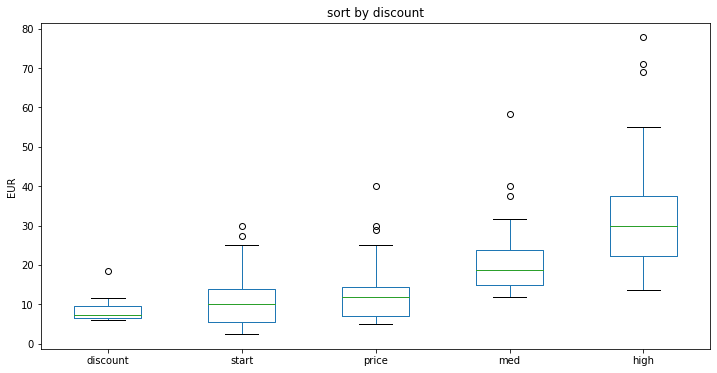

In [16]:
cols = [ 'discount', 'start', 'price', 'med', 'high', 'title', 'seller']
plot(cols, 'discount', kind='box', head=30)

In the box diagram, we see price ranges of 30 highest discount offers.
The price box is very close to start box at the scale, while med and high boxes are significantly moved up. That means these records are worth more than they are valued by seller and very close to the lowest prices on the market.

How it look on the line plot?

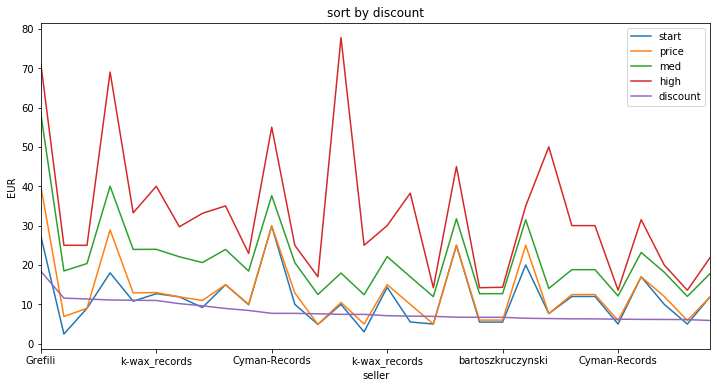

In [17]:
cols = [ 'start', 'price', 'med', 'high', 'title', 'discount', 'seller']
plot(cols, 'discount', kind='line', ascend=False, head=30)

Discount is slightly changing while other prices differ on scale. The common is distance between 
<font color='orange'>price</font>, 
<font color='green'>med</font> and 
<font color='red'>high</font> lines and proximity of 
<font color='orange'>price</font> and 
<font color='blue'>start</font> lines which are very often at the same level.
This is just other visual description of what we already have seen on box diagram. 

### Negative discount

Negative discount is a profit for seller in relation to median.
Changing argument `ascend=True` in `plot` function will show the most expensive records.

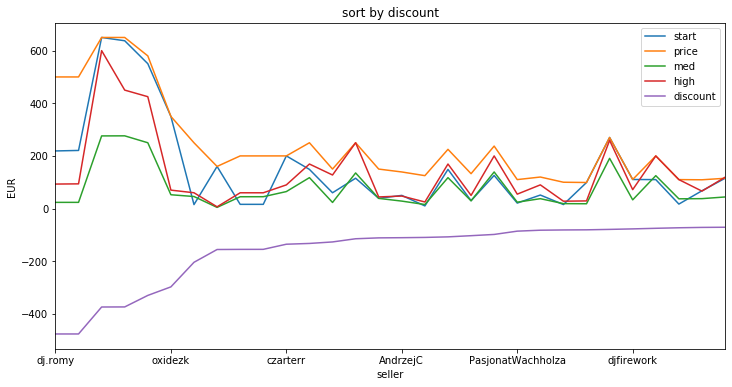

In [18]:
plot(cols, 'discount', kind='line', ascend=True)

These prices seems to be "sellers wishes" as we can see the <font color='orange'>price</font> is rather above the <font color='red'>highest</font> possible record sales. 

## Supply and Demand Analysis

### Rare and valuable

An interesting phenomenon from last diagram is <font color='blue'>start</font> line above <font color='red'>high</font>. These are hard-to-find records, whose owners probably believe they have one of the last items on market, so their market price is started above highest price from sale history. It's not a best bargain here, but these hard-to-find records probably will gain in value in future, so they also could be consider as kind of investments in some terms.

In [19]:
len(df[df['start'] > df['high']])

45

In [20]:
df[df['start'] > df['high']][print_view].head(10)

,discount,title,start,price,med,high,url,want,have,for_sale
53,-5.52,b'Dougal & Evolution (31) / Clarkee* & Phantas...,14.35,14.35,8.83,13.24,https://www.discogs.com/sell/item/1180324272,216,318,3
65,-35.10,b'Afrika Bambaataa & WestBam Present I.F.O. - ...,21.25,50.00,14.90,17.00,https://www.discogs.com/sell/item/1082693929,103,68,4
162,-11.03,"b'Various - The Future EP (12"", EP)'",22.08,27.59,16.56,22.07,https://www.discogs.com/sell/item/1046479800,109,121,5
175,-18.17,b'Desired State - Expansion / Dance The Dream ...,40.00,43.00,24.83,38.64,https://www.discogs.com/sell/item/409023543,342,292,3
219,-71.62,"b'The DSC - The DSC EP (2x12"", EP, Ltd)'",67.50,109.29,37.67,66.23,https://www.discogs.com/sell/item/396474236,148,100,2
267,-110.70,"b""Smoove - Dead Men's Shirts (2xLP)""",50.00,139.00,28.30,47.50,https://www.discogs.com/sell/item/621584796,141,74,3
502,-49.00,"b'Ekeaze - Acid Is Back (12"")'",99.00,99.00,50.00,57.00,https://www.discogs.com/sell/item/997894753,298,198,1
517,-25.00,"b'Falcom - Hypnotik 06 (12"")'",50.00,50.00,25.00,45.00,https://www.discogs.com/sell/item/997895021,152,129,1
557,-476.50,"b'Cheech - Chicago Wild / Bassline (12"")'",218.87,500.00,23.50,93.03,https://www.discogs.com/sell/item/961111746,523,71,5
585,-18.23,"b'Direct - Let It Ride (Remix) (12"", RE, Sil)'",24.98,24.98,6.75,16.42,https://www.discogs.com/sell/item/779517809,245,27,4


### Rarity

Rarity is not always an indicator for good bargain or investment. Take a look at sorting by `have` value with `ascend=True`. 

In [21]:
df[print_view].sort_values(by='have', ascending=True).head(5)

,discount,title,start,price,med,high,url,want,have,for_sale
2261,-155.60,"b'Unknown Artist - The Voice (12"", S/Sided, W/...",160.00,160.00,4.40,6.62,https://www.discogs.com/sell/item/1120847280,127,7,1
1256,-28.06,"b'Melt (6) - The Calling (12"", W/Lbl, Sta)'",18.61,39.00,10.94,16.42,https://www.discogs.com/sell/item/639385343,104,9,2
1414,-2.20,b'S. Bicknell* - Lost Recordings #2 - How Can ...,8.76,8.76,6.56,6.57,https://www.discogs.com/sell/item/857249709,103,12,3
2552,-9.80,"b'Gat Decor - Passion (12"", W/Lbl, Sta)'",19.00,19.00,9.20,29.95,https://www.discogs.com/sell/item/1110826889,328,13,2
1840,-24.50,"b'Various - 1st Unit (12"")'",34.00,50.00,25.50,42.46,https://www.discogs.com/sell/item/1149406579,148,16,5


Above records are rare and looks hard-to-find (`have` and `for_sale` counts), but they are not the best bargains (`discount` count). 

That needs to apply more conditions and choose different sorting. 

### Want and have

- supply is represented by `for_sale` 
- demand is represented by `want`
- each `have` could change into `for_sale` in future


For sorting purpose, create new column with `want` in relation to `have`.

In [22]:
# want/have ratio
df['whratio'] = df['want'] / df['have']
print_view.append('whratio')

`whratio` describe 'want/have' relation as a value:
- `whratio < 1` - more users have the record than want it
- `whratio > 1` - more users want the record than have it
- the higher `whratio` is - the more users want the record and the less user have it

### Final Conditions

The best bargains would be described as records in well condition, price and possibilitty to re-sell in future.
Based on earlier analysis of prices and demand, this should be achieved by adjusting fields below:
- `want > 200` -  possible buyers
- `discount > 4` - value of discount
- `for_sale < 15` - low market supply

In [23]:
best_bargains = df[(df['want'] > 200) & (df['discount'] > 4) & (df['for_sale'] < 15)]

In [24]:
print('{} of {} offers left'.format(len(best_bargains), len(df)))

10 of 3491 offers left


- sorted `by='whratio', ascending=False`

In [25]:
# Add 'last_sold' column to see if any copies were sold lately
print_view.append('last_sold')

In [26]:
best_bargains[print_view].sort_values(by='whratio', ascending=False)

,discount,title,start,price,med,high,url,want,have,for_sale,whratio,last_sold
3206,5.00,"b'grooveman Spot - Runnin\' Pizza EP 1 (12"", EP)'",45.00,45.00,50.00,68.00,https://www.discogs.com/sell/item/1011224823,225,54,3,4.166667,Apr 20
2046,8.95,b'Bufiman / Tim Schumacher (3) - Manifest#003 ...,15.00,15.00,23.95,35.00,https://www.discogs.com/sell/item/1039981956,451,117,10,3.854701,Aug 20
2861,4.25,"b'Jazz-N-Groove - Jazzy Grooves Volume 1 (12"")'",9.35,13.25,17.50,35.00,https://www.discogs.com/sell/item/614958065,523,153,14,3.418301,Sep 20
296,7.72,"b'Jonathan Kusuma - Automatone (12"")'",29.90,29.90,37.62,55.00,https://www.discogs.com/sell/item/1175328888,215,87,3,2.471264,Aug 20
154,4.74,"b'Da Juice - Hear The Angels (12"")'",6.66,12.00,16.74,25.24,https://www.discogs.com/sell/item/1025690021,272,125,14,2.176000,Jul 20
1007,4.60,"b'Da Juice - Hear The Angels (12"")'",6.66,12.00,16.60,25.24,https://www.discogs.com/sell/item/1025690021,272,125,13,2.176000,Jul 20
1305,4.38,"b'Leo Anibaldi - Aeon (2x12"")'",18.47,20.00,24.38,39.99,https://www.discogs.com/sell/item/963312887,489,250,9,1.956000,Oct 19
659,11.37,b'Shed / Don Williams / Sven Weisemann - 2nd B...,9.00,9.00,20.37,25.00,https://www.discogs.com/sell/item/1162546824,397,233,14,1.703863,Aug 20
3343,4.99,"b'Nina Kraviz - Nina Kraviz (2xLP, Album, Gat)'",19.90,20.00,24.99,26.00,https://www.discogs.com/sell/item/1114785017,593,409,13,1.449878,Aug 20
843,5.32,b'Break The Limits - Break The Limits Part One...,10.00,10.00,15.32,19.90,https://www.discogs.com/sell/item/1141444959,225,177,13,1.271186,Jul 20


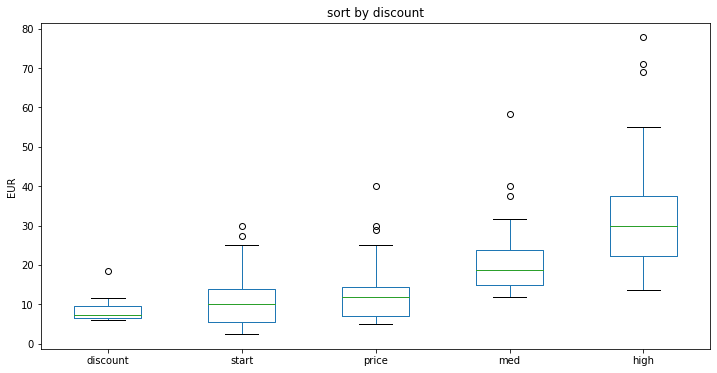

In [27]:
cols = [ 'discount', 'start', 'price', 'med', 'high', 'title', 'seller']
plot(cols, 'discount', kind='box', head=30)